In [31]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
import os
from collections import Counter
import seaborn as sns

In [32]:
K = 14
L = len('Shchapaniak')
X = ((K*L*23) % 20) + 1
Y = ((X + ((K*5 + L*7) % 19)) % 20) + 1

file1 = f'{X:03}.txt'
file2 = f'{Y:03}.txt'
print(f'Files: {file1}, {file2}')

Files: 003.txt, 018.txt


In [33]:
'''
From both data files, load the texts for analysis.
For each text separately, determine the absolute frequencies of individual characters (symbols including space) that occur in the texts.
Furthermore, assume that the first text is generated from a homogeneous Markov chain with discrete time.
'''

def calc_freq(filename):
  with open(os.path.join('files', filename), 'r') as f:
    text = f.readlines()[1].strip()
    letters, letters_counts = np.unique(list(text), return_counts=True)

  return text, dict(zip(letters, letters_counts))

In [34]:
'''
Assuming the above, estimate the transition matrix of the Markov chain for the first text.
For the estimation of the transition matrix, see lecture 17.
Suitably illustrate the estimated transition probabilities graphically, for example, by using a heatmap.
Describe the method by which you estimate the parameters!
'''

class MarkovChain:
  def __init__(self, text, text_freq):
    self.text = text
    self.text_freq = text_freq
    self.transition_matrix = None
    self.states = None

  def calculate_transition_matrix(self):
    self.states = self.text_freq.keys()
    state_index = {state: i for i, state in enumerate(self.states)}
    self.transition_matrix = np.zeros((len(self.states), len(self.states)), dtype=float)

    for i in range(len(self.text) - 2):
      current_state = state_index[self.text[i]]
      next_state = state_index[self.text[i+1]]
      self.transition_matrix[current_state, next_state] += 1

    self.transition_matrix = self.transition_matrix / np.sum(self.transition_matrix, axis=1).reshape(-1, 1)

  def get_transition_matrix(self):
    return self.transition_matrix

  def plot_heatmap(self):
    plt.figure(figsize=(14, 12))
    sns.heatmap(self.transition_matrix, annot=True, fmt=".2f",
                xticklabels=self.states, yticklabels=self.states)
    plt.title('Markov Chain Transition Matrix Heatmap')
    plt.xlabel('Next State')
    plt.ylabel('Current State')
    plt.show()


In [35]:
'''
Based on the matrix from the previous point, find the stationary distribution π of this chain for the first text.
Verify that it is indeed a stationary distribution!
'''

def find_stationary_distribution(transition_matrix, el_count):
  pi = sp.linalg.null_space((transition_matrix - np.eye(el_count)).T).T[0]
  pi = pi / np.sum(pi)
  return pi


In [36]:
'''
Compare the character distribution of the second text with the stationary distribution π, i.e., at a 5% significance level,
test the hypothesis that the character distribution of the second text is equal to the distribution π from the previous point.
Properly describe the hypothesis you are testing!
'''

# Pearson's chi-squared test
class PearsonsTest:
    def __init__(self, text2_freq, stat_distr1, text2_len):
      self.stat_distr1 = stat_distr1
      self.text2_freq = text2_freq
      self.text2_len = text2_len
      self.sets_array = []

    def normalize_table(self):
      while any(expected_freq < 5 for _, expected_freq, _ in self.sets_array):
        sorted_array = sorted(self.sets_array, key=lambda x: x[1])
        smallest = sorted_array[:2]

        combined_letter = smallest[0][0] + smallest[1][0]
        combined_expected = smallest[0][1] + smallest[1][1]
        combined_actual = smallest[0][2] + smallest[1][2]

        self.sets_array.append((combined_letter, combined_expected, combined_actual))

        self.sets_array.remove(smallest[0])
        self.sets_array.remove(smallest[1])

      print(self.sets_array)

    def test(self, alpha, normalize_flag):
      for (letter, freq), distr_prob in zip(self.text2_freq.items(), self.stat_distr1):
        expected_freq = self.text2_len * distr_prob
        self.sets_array.append((letter, expected_freq, freq))

      print(self.sets_array)
      if normalize_flag:
        self.normalize_table()

      test_val = 0.0
      for _, np, N in self.sets_array:
        test_val += (N - np)**2 / np

      ddf = len(self.sets_array) - 1
      critical_value= sp.stats.chi2.isf(alpha, ddf)
      p_value = sp.stats.chi2.sf(test_val, ddf)
      print(f'Manual values: ddf: {ddf}, p_value: {p_value}, test_val: {test_val}, critical_value: {critical_value}')

      print(sp.stats.chisquare([s[2] for s in self.sets_array], [s[1] for s in self.sets_array]))

1. task
{' ': 1019, 'a': 296, 'b': 62, 'c': 70, 'd': 151, 'e': 484, 'f': 97, 'g': 89, 'h': 258, 'i': 309, 'j': 3, 'k': 29, 'l': 156, 'm': 145, 'n': 299, 'o': 329, 'p': 36, 'q': 2, 'r': 227, 's': 268, 't': 340, 'u': 134, 'v': 45, 'w': 100, 'x': 6, 'y': 123, 'z': 9}
{' ': 1079, 'a': 391, 'b': 69, 'c': 94, 'd': 171, 'e': 542, 'f': 104, 'g': 96, 'h': 281, 'i': 300, 'j': 6, 'k': 45, 'l': 169, 'm': 136, 'n': 278, 'o': 341, 'p': 72, 'q': 4, 'r': 299, 's': 290, 't': 468, 'u': 117, 'v': 52, 'w': 118, 'x': 8, 'y': 96, 'z': 5}

2. task


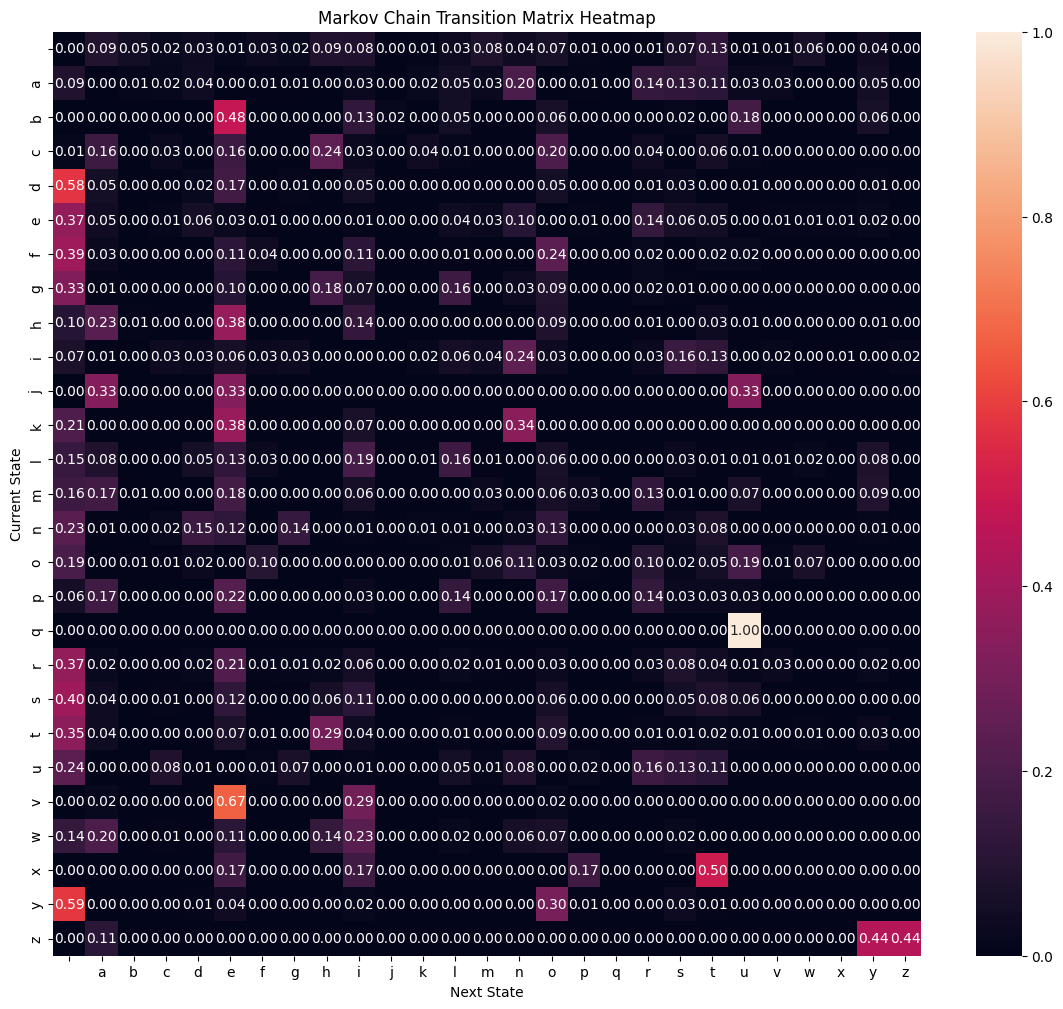

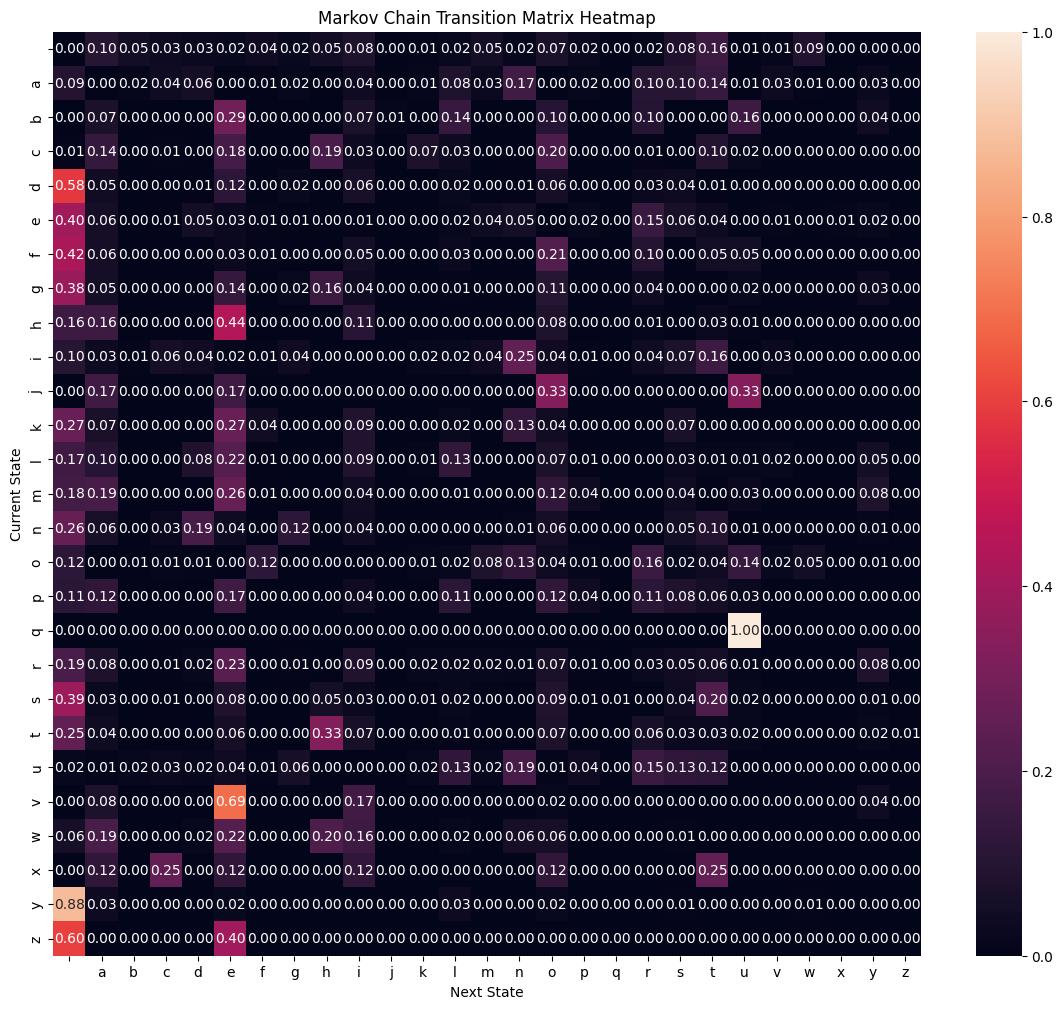


3. task
[0.20043822 0.05821905 0.01219736 0.013766   0.02970201 0.09519371
 0.01907474 0.01750049 0.05074636 0.06058887 0.00059013 0.00570491
 0.03068281 0.02852009 0.05880308 0.06470688 0.00708284 0.0003934
 0.04467082 0.0527118  0.06667719 0.02636176 0.00885396 0.01966934
 0.00117889 0.02420055 0.00176472]

[(' ', 1128.6676345399371, 1079), ('a', 327.831472378404, 391), ('b', 68.68331555302288, 69), ('c', 77.5163710757059, 94), ('d', 167.25202502680003, 171), ('e', 536.0357637001382, 542), ('f', 107.4098593758747, 104), ('g', 98.54527108361394, 96), ('h', 285.7527424391292, 281), ('i', 341.1759353832924, 300), ('j', 3.3230410147754297, 6), ('k', 32.12437357285719, 45), ('l', 172.7748781337574, 169), ('m', 160.59665396197138, 136), ('n', 331.1201488878279, 278), ('o', 364.3644567841669, 341), ('p', 39.88348023852814, 72), ('q', 2.2152456026298863, 4), ('r', 251.5413882478122, 299), ('s', 296.82012751482984, 290), ('t', 375.4592427802029, 468), ('u', 148.44306543265222, 117), ('v', 49

In [37]:
############# 1. task #############
text1, text1_freq = calc_freq(file1)
text2, text2_freq = calc_freq(file2)
print("1. task")
print(text1_freq)
print(text2_freq)
print()
###################################

############# 2. task #############
mc1 = MarkovChain(text1, text1_freq)
mc2 = MarkovChain(text2, text2_freq)

print("2. task")
mc1.calculate_transition_matrix()
mc1.plot_heatmap()

mc2.calculate_transition_matrix()
mc2.plot_heatmap()
print()
###################################

############# 3. task #############
stat_distr1 = find_stationary_distribution(mc1.get_transition_matrix(), len(text1_freq.keys()))
stat_distr2 = find_stationary_distribution(mc2.get_transition_matrix(), len(text2_freq.keys()))

print("3. task")
print(stat_distr1)
print()
###################################

############# 4. task #############
pearson_test = PearsonsTest(text2_freq, stat_distr1, len(text2))
pearson_test.test(0.05, True)
###################################